In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import numpy as np
import os

In [31]:
def prepare_hume_data(path):
    df_facial = pd.read_csv(path, index_col=0)
    df_facial.drop('start', axis=1, inplace=True)
    df_facial.columns = ['hume_anger', 'hume_disgust', 'hume_fear', 'hume_joy', 'hume_sadness', 'hume_surprise', 'hume_neutral', 'start_patch']
    df_facial['start_patch'] = df_facial['start_patch'].astype('int64')
    df_facial = df_facial.groupby('start_patch').mean().reset_index()
    return df_facial
    

In [4]:
def merge_text_hume_data(df_hume, df_fer):
    df_merged = pd.merge(df_hume, df_fer, on=['start_patch'], how='inner').drop('start_patch', axis=1)
    return df_merged

In [35]:
def prepare_fer_data(path):
    df_facial = pd.read_csv(path, index_col=0)
    #df_facial.drop('start', axis=1, inplace=True)
    df_facial.columns = ['fer_anger', 'fer_disgust', 'fer_fear', 'fer_joy', 'fer_sadness', 'fer_surprise', 'fer_neutral', 'start_patch']
    df_facial['start_patch'] = df_facial['start_patch'].astype('int64')
    df_facial = df_facial.groupby('start_patch').mean().reset_index()
    return df_facial
    

In [6]:
def compare_csv_data(df1_name_hume, df2_name):
    # Read the CSV files into pandas DataFrames
    df1 = df1_name_hume
    df2 = df2_name
    
    # Extract the emotion columns from each DataFrame
    hume_emotions = ['hume_anger', 'hume_disgust', 'hume_fear', 'hume_joy', 'hume_sadness', 'hume_surprise', 'hume_neutral']

    fer_emotions = ['fer_anger', 'fer_disgust', 'fer_fear', 'fer_joy', 'fer_sadness', 'fer_surprise', 'fer_neutral']
    
    # # Iterate over the emotion columns and plot the data for each file
    # for emotion in hume_emotions:
    #     plt.figure()
    #     plt.plot(df1['hume_start_patch'], df1[emotion], label= str('hume'))
    #     plt.xlabel('Timestamp')
    #     plt.ylabel('Score')
    #     plt.title('Comparison of ' + emotion)
    #     plt.legend()
    #     plt.show()

    # for emotion in fer_emotions:
    #     plt.figure()
    #     plt.plot(df2['fer_start_patch'], df2[emotion], label= str('fer'))
    #     plt.xlabel('Timestamp')
    #     plt.ylabel('Score')
    #     plt.title('Comparison of ' + emotion)
    #     plt.legend()
    #     plt.show()

    plt.figure()
    plt.plot(df1['start_patch'], df1['hume_anger'], label= str('hume'))
    plt.plot(df2['start_patch'], df2['fer_anger'], label= str('fer'))
    plt.xlabel('Timestamp')
    plt.ylabel('Score')
    plt.title('Comparison of ' + 'Anger')
    plt.legend()
    plt.show()


In [7]:
def get_correlations_with_binary(df, binary_feature, continuous_features, corr_func= pearsonr ):
    df = df.dropna()
    correlation_data = []
    for feature in continuous_features:
        corr, p_value = corr_func(df[feature], df[binary_feature])
        correlation_data.append((feature, corr, p_value))
    
    data = correlation_data
    # Extract feature names, correlations, and p-values
    features = [item[0] for item in data]
    correlations = [item[1] for item in data]
    p_values = [item[2] for item in data]

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the correlations as vertical bars
    ax.bar(features, correlations, color='steelblue')

    # Set the y-axis label
    ax.set_ylabel('Correlation')

    # Add horizontal gridlines
    ax.yaxis.grid(True)

    # Set the title
    ax.set_title('Correlation with Binary Variable')

    # Add error bars representing p-values
    ax.errorbar(features, correlations, yerr=np.abs(correlations), fmt='none', color='black', capsize=5, label='p-value')

    # Add p-values and absolute correlation values as text annotations
    for feature, correlation, p_value in zip(features, correlations, p_values):
        ax.text(feature, 0, f'p={p_value:.2f}', ha='center', va='bottom')
        ax.text(feature, correlation, f'{abs(correlation):.2f}', ha='center', va='top')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Display the plot
    plt.tight_layout()
    plt.show()
    return data

In [41]:
df_hume_1 = prepare_hume_data('../data/hume/processed/Cuban_vocals_afternoon.csv')
df_hume_2 = prepare_hume_data('../data/hume/processed/Cuban_vocals_morning.csv')
df_hume_3 = prepare_hume_data('../data/hume/processed/Funk_band_afternoon.csv')
df_hume_4 = prepare_hume_data('../data/hume/processed/Funk_band_morning.csv')
df_hume_5 = prepare_hume_data('../data/hume/processed/Funk_rhythm_afternoon.csv')
df_hume_6 = prepare_hume_data('../data/hume/processed/Funk_rhythm_morning.csv')


In [85]:
directory = '../data/hume/processed/'
df_hume = pd.DataFrame()

def create_hume_df(directory, df_hume):
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            df.drop(columns= ['start', 'Unnamed: 0'], axis=1, inplace=True)
            
            # Append the DataFrame to the main DataFrame
            df_hume = pd.concat([df_hume, df], ignore_index=True)

    return df_hume

In [86]:
df_hume = create_hume_df(directory, df_hume)

#df_hume.drop('start', axis=1, inplace=True)
df_hume.columns = ['hume_anger', 'hume_disgust', 'hume_fear', 'hume_joy', 'hume_sadness', 'hume_surprise', 'hume_neutral', 'start_patch']
df_hume['start_patch'] = df_hume['start_patch'].astype('int64')
df_hume = df_hume.groupby('start_patch').mean().reset_index()

In [87]:
df_hume

,start_patch,hume_anger,hume_disgust,hume_fear,hume_joy,hume_sadness,hume_surprise,hume_neutral
0,0,0.080663,0.132014,0.166082,0.102538,0.192381,0.097403,0.241342
1,5,0.085466,0.131505,0.164129,0.098173,0.193091,0.095569,0.252193
2,10,0.085801,0.128598,0.158595,0.112366,0.183964,0.098236,0.241047
3,15,0.086469,0.130451,0.162959,0.100313,0.192517,0.096208,0.248090
4,20,0.083537,0.129772,0.163608,0.104915,0.188563,0.097589,0.244721
5,25,0.082940,0.132985,0.161890,0.107615,0.190240,0.096735,0.238185
6,30,0.085073,0.130271,0.156516,0.113755,0.183732,0.097841,0.236154
7,35,0.078837,0.130542,0.164134,0.106140,0.187993,0.096912,0.239152
8,40,0.080609,0.131361,0.163635,0.106295,0.188486,0.099311,0.234795
9,45,0.080558,0.129899,0.167271,0.098894,0.191584,0.098202,0.242882


In [42]:
df_fer_1 = prepare_fer_data('../data/FER_Output/processed/Cuban_vocals_afternoon.csv')
df_fer_2 = prepare_fer_data('../data/FER_Output/processed/Cuban_vocals_morning.csv')
df_fer_3 = prepare_fer_data('../data/FER_Output/processed/Funk_band_afternoon.csv')
df_fer_4 = prepare_fer_data('../data/FER_Output/processed/Funk_band_morning.csv')
df_fer_5 = prepare_fer_data('../data/FER_Output/processed/Funk_rhythm_afternoon.csv')
df_fer_6 = prepare_fer_data('../data/FER_Output/processed/Funk_rhythm_morning.csv')


In [91]:
directory = '../data/FER_Output/processed/'
df_fer = pd.DataFrame()

def create_fer_df(directory, df_fer):
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            
            # Append the DataFrame to the main DataFrame
            df_fer = pd.concat([df_fer, df], ignore_index=True)

    return df_fer


In [92]:
df_fer = create_fer_df(directory, df_fer)

In [93]:
df_fer = df_fer.drop(columns= ['Unnamed: 0'])

df_fer.columns = ['fer_anger', 'fer_disgust', 'fer_fear', 'fer_joy', 'fer_sadness', 'fer_surprise', 'fer_neutral', 'start_patch']
df_fer['start_patch'] = df_fer['start_patch'].astype('int64')
df_fer = df_fer.groupby('start_patch').mean().reset_index()

In [95]:
df_merged = merge_text_hume_data(df_hume, df_fer)

In [96]:
df_merged.head()

,hume_anger,hume_disgust,hume_fear,hume_joy,hume_sadness,hume_surprise,hume_neutral,fer_anger,fer_disgust,fer_fear,fer_joy,fer_sadness,fer_surprise,fer_neutral
0,0.080663,0.132014,0.166082,0.102538,0.192381,0.097403,0.241342,0.193293,0.001016,0.104171,0.173226,0.303953,0.016967,0.206285
1,0.085466,0.131505,0.164129,0.098173,0.193091,0.095569,0.252193,0.194332,0.001146,0.099875,0.153038,0.363217,0.017800,0.169694
2,0.085801,0.128598,0.158595,0.112366,0.183964,0.098236,0.241047,0.220342,0.000734,0.096111,0.143209,0.337369,0.017584,0.183712
3,0.086469,0.130451,0.162959,0.100313,0.192517,0.096208,0.248090,0.199404,0.001307,0.104971,0.160424,0.360834,0.018048,0.153823
4,0.083537,0.129772,0.163608,0.104915,0.188563,0.097589,0.244721,0.199634,0.002577,0.100386,0.173507,0.330356,0.016886,0.175538


In [97]:
df_merged_corr = df_merged.corr().drop(['hume_anger', 'hume_disgust', 'hume_fear', 'hume_joy', 'hume_sadness', 'hume_surprise', 'hume_neutral'], axis=1)
df_merged_corr = df_merged_corr.drop(['fer_anger', 'fer_disgust', 'fer_fear', 'fer_joy', 'fer_sadness', 'fer_surprise', 'fer_neutral'],axis=0)
df_merged_corr

,fer_anger,fer_disgust,fer_fear,fer_joy,fer_sadness,fer_surprise,fer_neutral
hume_anger,-0.293579,0.096089,0.012630,-0.023763,0.274417,-0.216421,-0.075956
hume_disgust,-0.090896,-0.114238,0.201003,-0.053324,0.114840,-0.007443,-0.158566
hume_fear,0.039040,0.102689,0.295460,-0.289560,0.169540,-0.002621,-0.149799
hume_joy,-0.160161,0.083923,-0.271706,0.364033,-0.207604,0.195837,0.173845
hume_sadness,-0.005957,-0.042545,0.216927,-0.258733,0.232656,-0.089059,-0.160678
hume_surprise,-0.236994,0.006333,0.162156,0.213149,-0.062078,0.146912,-0.090897
hume_neutral,0.239334,-0.073997,0.131468,-0.335176,0.130207,-0.338314,-0.046894


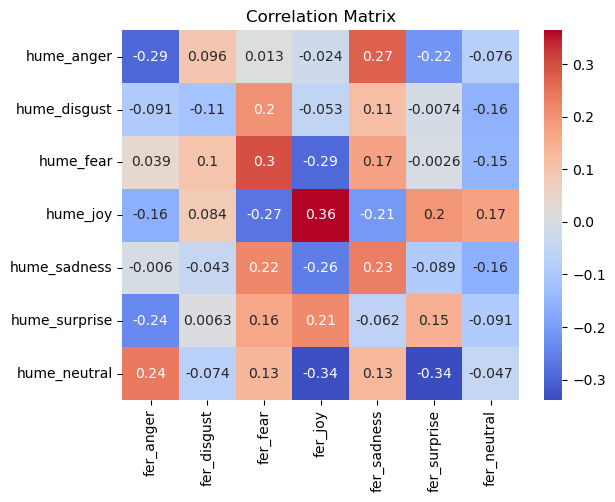

In [98]:
sns.heatmap(df_merged_corr, annot=True, cmap='coolwarm')

# Customize the plot
plt.title('Correlation Matrix')
plt.show()

In [ ]:
compare_csv_data(df_hume_1, df_fer_1)

In [ ]:
df_hume_2 = prepare_hume_data('../data/hume/processed/Cuban_vocals_morning.csv')

In [ ]:
compare_csv_data(df_hume_2, '../data/FER_Output/processed/Cuban_vocals_morning.csv')

In [ ]:
df_hume_3 = prepare_hume_data('../data/hume/processed/Funk_band_morning.csv')

In [ ]:
compare_csv_data(df_hume_3, '../data/FER_Output/processed/Funk_band_morning.csv')

In [ ]:
df_hume_4 = prepare_hume_data('../data/hume/processed/Funk_rhythm_morning.csv')

In [ ]:
compare_csv_data(df_hume_4, '../data/FER_Output/processed/Funk_rhythm_morning.csv')

#### Validation by comparing the max feature for each time slot of 5min

In [14]:
def prepare_hume_data(path, var_neutral):
    df_facial = pd.read_csv(path, index_col=0)
    df_facial.drop('start', axis=1, inplace=True)
    df_facial.columns = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral', 'start_patch']
    df_facial['start_patch'] = df_facial['start_patch'].astype('int64')
    df_facial = df_facial.groupby('start_patch').mean().reset_index()
    if var_neutral == True:
        df_facial = df_facial.drop(columns=['start_patch'])
    else:
        df_facial = df_facial.drop(columns=['start_patch', 'neutral'])
    return df_facial
    

In [15]:
def prepare_fer_data(path, var_neutral):
    df_facial = pd.read_csv(path, index_col=0)
    #df_facial.drop('start', axis=1, inplace=True)
    df_facial.columns = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral', 'start_patch']
    df_facial['start_patch'] = df_facial['start_patch'].astype('int64')
    df_facial = df_facial.groupby('start_patch').mean().reset_index()
    if var_neutral == True:
        df_facial = df_facial.drop(columns=['start_patch'])
    else:
        df_facial = df_facial.drop(columns=['start_patch', 'neutral'])
    return df_facial
    

In [16]:
def aggregate_to_flow_nonflow(df_merged_cleaned, var_neutral):
    flow_emotions = ['joy', 'fear', 'surprise']
    if var_neutral == True:
        non_flow =['neutral', 'sadness', 'anger']
    else:
        non_flow =['disgust', 'sadness', 'anger']
    #df_merged_cleaned = df_merged.drop(['segment_id', 'start', 'end', 'negative'], axis=1)
    df_merged_cleaned= df_merged_cleaned.dropna(axis=0)
    df_merged_cleaned
    df_merged_cleaned['flow_emotions'] = df_merged_cleaned[flow_emotions].mean(axis=1)
    df_merged_cleaned['non_flow_emotions'] = df_merged_cleaned[non_flow].mean(axis=1)

    if var_neutral == True:
        df_merged_cleaned = df_merged_cleaned.drop(columns=['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral'])
    else:
        df_merged_cleaned = df_merged_cleaned.drop(columns=['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise'])

    

    return df_merged_cleaned

In [17]:
def create_dataframe_with_icolumns(num_columns):
    column_names = [f'Column{i}' for i in range(1, num_columns + 1)]
    df_new = pd.DataFrame(columns=column_names)    
    
    return df_new


In [18]:
def select_max_score_to_array(df_aggregated_to_flow_non_flow, df_scores, num_max_scores):
    scores = []
    for index, row in df_aggregated_to_flow_non_flow.iterrows():
        max_score = row.nlargest(num_max_scores)
        df_scores.loc[index] = max_score.index

    # Iterate over each row in the dataframe
    for _, row in df_scores.iterrows():
        # Convert the row to a list and append it to the row_array
        scores.append(row.tolist())
    

    return scores

In [19]:
def validate_hume_fer(scores_hume, scores_fer):
    # Check if the length of the arrays is the same
    if len(scores_hume) == len(scores_fer):
        # Initialize a count variable to keep track of matching elements
        count = 0

        # Iterate over the arrays using zip()
        for element1, element2 in zip(scores_hume, scores_fer):
            # Compare the elements from both arrays
            if element1 == element2:
                #print(f"Elements match: {element1}")
                count += 1
            else:
                #print(f"Elements do not match: {element1} and {element2}")
                count+= 0

        # Calculate the percentage of matching elements
        percentage = (count / len(scores_hume)) * 100
        print(f"Percentage of matching elements: {percentage}%")
    else:
        print("Arrays have different lengths.")

    return percentage

In [20]:
def compare_arrays_and_delete(arr1, arr2):
    if len(arr1) > len(arr2):
        del arr1[len(arr2):]
    elif len(arr2) > len(arr1):
        del arr2[len(arr1):]

In [21]:
def hume_fer_validation(hume_path, fer_path, num_columns, aggregation, var_neutral):
    df_hume = prepare_hume_data(hume_path, var_neutral)
    df_fer = prepare_fer_data(fer_path, var_neutral)

    if aggregation == True:
        df_hume_agg = aggregate_to_flow_nonflow(df_hume, var_neutral)
        df_fer_agg = aggregate_to_flow_nonflow(df_fer, var_neutral)

        df_hume_scores = create_dataframe_with_icolumns(num_columns)
        df_fer_scores = create_dataframe_with_icolumns(num_columns)

        hume_scores = select_max_score_to_array(df_hume_agg, df_hume_scores, num_columns)
        fer_scores = select_max_score_to_array(df_fer_agg, df_fer_scores, num_columns)

    else:
        df_hume_scores = create_dataframe_with_icolumns(num_columns)
        df_fer_scores = create_dataframe_with_icolumns(num_columns)

        hume_scores = select_max_score_to_array(df_hume, df_hume_scores, num_columns)
        fer_scores = select_max_score_to_array(df_fer, df_fer_scores, num_columns)

    compare_arrays_and_delete(hume_scores, fer_scores)

    overall_score = validate_hume_fer(hume_scores, fer_scores)

    return overall_score

In [22]:
score_incl_neutral_agg = []
number_max_elements = 1
var_aggregation = True
var_neutral = True

score_incl_neutral_agg.append(hume_fer_validation('../data/hume/processed/Cuban_vocals_afternoon.csv','../data/FER_Output/processed/Cuban_vocals_afternoon.csv', number_max_elements, var_aggregation, var_neutral ))
score_incl_neutral_agg.append(hume_fer_validation('../data/hume/processed/Cuban_vocals_morning.csv', '../data/FER_Output/processed/Cuban_vocals_morning.csv', number_max_elements,var_aggregation, var_neutral))
score_incl_neutral_agg.append(hume_fer_validation('../data/hume/processed/Funk_band_afternoon.csv', '../data/FER_Output/processed/Funk_band_afternoon.csv', number_max_elements,var_aggregation, var_neutral))
score_incl_neutral_agg.append(hume_fer_validation('../data/hume/processed/Funk_band_morning.csv', '../data/FER_Output/processed/Funk_band_morning.csv', number_max_elements,var_aggregation, var_neutral))
score_incl_neutral_agg.append(hume_fer_validation('../data/hume/processed/Funk_rhythm_afternoon.csv', '../data/FER_Output/processed/Funk_rhythm_afternoon.csv', number_max_elements,var_aggregation, var_neutral))
score_incl_neutral_agg.append(hume_fer_validation('../data/hume/processed/Funk_rhythm_morning.csv', '../data/FER_Output/processed/Funk_rhythm_morning.csv', number_max_elements,var_aggregation, var_neutral))

validation = sum(score_incl_neutral_agg)/len(score_incl_neutral_agg)

print(f"Aggregation including neutral: {validation}%")

Percentage of matching elements: 93.54838709677419%
Percentage of matching elements: 100.0%
Percentage of matching elements: 100.0%
Percentage of matching elements: 100.0%
Percentage of matching elements: 100.0%
Percentage of matching elements: 92.3076923076923%
Aggregation including neutral: 97.64267990074443%


In [23]:
score_excl_neutral_agg = []
number_max_elements = 1
var_aggregation = True
var_neutral = False

score_excl_neutral_agg.append(hume_fer_validation('../data/hume/processed/Cuban_vocals_afternoon.csv','../data/FER_Output/processed/Cuban_vocals_afternoon.csv', number_max_elements, var_aggregation, var_neutral ))
score_excl_neutral_agg.append(hume_fer_validation('../data/hume/processed/Cuban_vocals_morning.csv', '../data/FER_Output/processed/Cuban_vocals_morning.csv', number_max_elements,var_aggregation, var_neutral))
score_excl_neutral_agg.append(hume_fer_validation('../data/hume/processed/Funk_band_afternoon.csv', '../data/FER_Output/processed/Funk_band_afternoon.csv', number_max_elements,var_aggregation, var_neutral))
score_excl_neutral_agg.append(hume_fer_validation('../data/hume/processed/Funk_band_morning.csv', '../data/FER_Output/processed/Funk_band_morning.csv', number_max_elements,var_aggregation, var_neutral))
score_excl_neutral_agg.append(hume_fer_validation('../data/hume/processed/Funk_rhythm_afternoon.csv', '../data/FER_Output/processed/Funk_rhythm_afternoon.csv', number_max_elements,var_aggregation, var_neutral))
score_excl_neutral_agg.append(hume_fer_validation('../data/hume/processed/Funk_rhythm_morning.csv', '../data/FER_Output/processed/Funk_rhythm_morning.csv', number_max_elements,var_aggregation, var_neutral))

validation = sum(score_excl_neutral_agg)/len(score_excl_neutral_agg)

print(f"Aggregation exluding neutral: {validation}%")

Percentage of matching elements: 58.06451612903226%
Percentage of matching elements: 25.0%
Percentage of matching elements: 96.875%
Percentage of matching elements: 100.0%
Percentage of matching elements: 79.3103448275862%
Percentage of matching elements: 61.53846153846154%
Aggregation exluding neutral: 70.13138708251334%


In [24]:
score_incl_neutral = []
number_max_elements = 1
var_aggregation = False
var_neutral = True

score_incl_neutral.append(hume_fer_validation('../data/hume/processed/Cuban_vocals_afternoon.csv','../data/FER_Output/processed/Cuban_vocals_afternoon.csv', number_max_elements, var_aggregation, var_neutral ))
score_incl_neutral.append(hume_fer_validation('../data/hume/processed/Cuban_vocals_morning.csv', '../data/FER_Output/processed/Cuban_vocals_morning.csv', number_max_elements,var_aggregation, var_neutral))
score_incl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_band_afternoon.csv', '../data/FER_Output/processed/Funk_band_afternoon.csv', number_max_elements,var_aggregation, var_neutral))
score_incl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_band_morning.csv', '../data/FER_Output/processed/Funk_band_morning.csv', number_max_elements,var_aggregation, var_neutral))
score_incl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_rhythm_afternoon.csv', '../data/FER_Output/processed/Funk_rhythm_afternoon.csv', number_max_elements,var_aggregation, var_neutral))
score_incl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_rhythm_morning.csv', '../data/FER_Output/processed/Funk_rhythm_morning.csv', number_max_elements,var_aggregation, var_neutral))

validation = sum(score_incl_neutral)/len(score_incl_neutral)

print(f"Max Emotion value with neutral: {validation}%")

Percentage of matching elements: 19.35483870967742%
Percentage of matching elements: 25.0%
Percentage of matching elements: 6.25%
Percentage of matching elements: 16.666666666666664%
Percentage of matching elements: 3.4482758620689653%
Percentage of matching elements: 11.538461538461538%
Max Emotion value with neutral: 13.7097071294791%


In [25]:
score_excl_neutral = []
number_max_elements = 1
var_aggregation = False
var_neutral = False

score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Cuban_vocals_afternoon.csv','../data/FER_Output/processed/Cuban_vocals_afternoon.csv', number_max_elements, var_aggregation, var_neutral ))
score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Cuban_vocals_morning.csv', '../data/FER_Output/processed/Cuban_vocals_morning.csv', number_max_elements,var_aggregation, var_neutral))
score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_band_afternoon.csv', '../data/FER_Output/processed/Funk_band_afternoon.csv', number_max_elements,var_aggregation, var_neutral))
score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_band_morning.csv', '../data/FER_Output/processed/Funk_band_morning.csv', number_max_elements,var_aggregation, var_neutral))
score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_rhythm_afternoon.csv', '../data/FER_Output/processed/Funk_rhythm_afternoon.csv', number_max_elements,var_aggregation, var_neutral))
score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_rhythm_morning.csv', '../data/FER_Output/processed/Funk_rhythm_morning.csv', number_max_elements,var_aggregation, var_neutral))

validation = sum(score_excl_neutral)/len(score_excl_neutral)

print(f"Max Emotion value without neutral: {validation}%")

Percentage of matching elements: 38.70967741935484%
Percentage of matching elements: 62.5%
Percentage of matching elements: 81.25%
Percentage of matching elements: 76.66666666666667%
Percentage of matching elements: 65.51724137931035%
Percentage of matching elements: 80.76923076923077%
Max Emotion value without neutral: 67.56880270576043%


In [26]:
score_excl_neutral = []
number_max_elements = 1
var_aggregation = False
var_neutral = False

#score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Cuban_vocals_afternoon.csv','../data/FER_Output/processed/Cuban_vocals_afternoon.csv', number_max_elements, var_aggregation, var_neutral ))
score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Cuban_vocals_morning.csv', '../data/FER_Output/processed/Cuban_vocals_morning.csv', number_max_elements,var_aggregation, var_neutral))
score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_band_afternoon.csv', '../data/FER_Output/processed/Funk_band_afternoon.csv', number_max_elements,var_aggregation, var_neutral))
score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_band_morning.csv', '../data/FER_Output/processed/Funk_band_morning.csv', number_max_elements,var_aggregation, var_neutral))
score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_rhythm_afternoon.csv', '../data/FER_Output/processed/Funk_rhythm_afternoon.csv', number_max_elements,var_aggregation, var_neutral))
score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_rhythm_morning.csv', '../data/FER_Output/processed/Funk_rhythm_morning.csv', number_max_elements,var_aggregation, var_neutral))

validation = sum(score_excl_neutral)/len(score_excl_neutral)

print(f"Max Emotion value without neutral and without first video: {validation}%")

Percentage of matching elements: 62.5%
Percentage of matching elements: 81.25%
Percentage of matching elements: 76.66666666666667%
Percentage of matching elements: 65.51724137931035%
Percentage of matching elements: 80.76923076923077%
Max Emotion value without neutral and without first video: 73.34062776304157%


In [27]:
score_excl_neutral_wo1 = []
number_max_elements = 1
var_aggregation = False
var_neutral = False

score_excl_neutral_wo1.append(hume_fer_validation('../data/hume/processed/Cuban_vocals_afternoon.csv','../data/FER_Output/processed/Cuban_vocals_afternoon.csv', number_max_elements, var_aggregation, var_neutral ))
score_excl_neutral_wo1.append(hume_fer_validation('../data/hume/processed/Cuban_vocals_morning.csv', '../data/FER_Output/processed/Cuban_vocals_morning.csv', number_max_elements,var_aggregation, var_neutral))
score_excl_neutral_wo1.append(hume_fer_validation('../data/hume/processed/Funk_band_afternoon.csv', '../data/FER_Output/processed/Funk_band_afternoon.csv', number_max_elements,var_aggregation, var_neutral))
score_excl_neutral_wo1.append(hume_fer_validation('../data/hume/processed/Funk_band_morning.csv', '../data/FER_Output/processed/Funk_band_morning.csv', number_max_elements,var_aggregation, var_neutral))
score_excl_neutral_wo1.append(hume_fer_validation('../data/hume/processed/Funk_rhythm_afternoon.csv', '../data/FER_Output/processed/Funk_rhythm_afternoon.csv', number_max_elements,var_aggregation, var_neutral))
score_excl_neutral_wo1.append(hume_fer_validation('../data/hume/processed/Funk_rhythm_morning.csv', '../data/FER_Output/processed/Funk_rhythm_morning.csv', number_max_elements,var_aggregation, var_neutral))

validation = sum(score_excl_neutral_wo1)/len(score_excl_neutral_wo1)

print(f"Max Emotion value without neutral and without first video: {validation}%")

Percentage of matching elements: 38.70967741935484%
Percentage of matching elements: 62.5%
Percentage of matching elements: 81.25%
Percentage of matching elements: 76.66666666666667%
Percentage of matching elements: 65.51724137931035%
Percentage of matching elements: 80.76923076923077%
Max Emotion value without neutral and without first video: 67.56880270576043%


In [28]:
two_score_excl_neutral = []
number_max_elements = 2
var_aggregation = False
var_neutral = False

two_score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Cuban_vocals_afternoon.csv','../data/FER_Output/processed/Cuban_vocals_afternoon.csv', number_max_elements, var_aggregation, var_neutral ))
two_score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Cuban_vocals_morning.csv', '../data/FER_Output/processed/Cuban_vocals_morning.csv', number_max_elements,var_aggregation, var_neutral))
two_score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_band_afternoon.csv', '../data/FER_Output/processed/Funk_band_afternoon.csv', number_max_elements,var_aggregation, var_neutral))
two_score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_band_morning.csv', '../data/FER_Output/processed/Funk_band_morning.csv', number_max_elements,var_aggregation, var_neutral))
two_score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_rhythm_afternoon.csv', '../data/FER_Output/processed/Funk_rhythm_afternoon.csv', number_max_elements,var_aggregation, var_neutral))
two_score_excl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_rhythm_morning.csv', '../data/FER_Output/processed/Funk_rhythm_morning.csv', number_max_elements,var_aggregation, var_neutral))

validation = sum(two_score_excl_neutral)/len(two_score_excl_neutral)

print(f"Two Max Emotion values without neutral: {validation}%")

Percentage of matching elements: 9.67741935483871%
Percentage of matching elements: 18.75%
Percentage of matching elements: 6.25%
Percentage of matching elements: 3.3333333333333335%
Percentage of matching elements: 0.0%
Percentage of matching elements: 3.8461538461538463%
Two Max Emotion values without neutral: 6.976151089054316%


In [29]:
two_score_incl_neutral = []
number_max_elements = 2
var_aggregation = False
var_neutral = True

two_score_incl_neutral.append(hume_fer_validation('../data/hume/processed/Cuban_vocals_afternoon.csv','../data/FER_Output/processed/Cuban_vocals_afternoon.csv', number_max_elements, var_aggregation, var_neutral ))
two_score_incl_neutral.append(hume_fer_validation('../data/hume/processed/Cuban_vocals_morning.csv', '../data/FER_Output/processed/Cuban_vocals_morning.csv', number_max_elements,var_aggregation, var_neutral))
two_score_incl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_band_afternoon.csv', '../data/FER_Output/processed/Funk_band_afternoon.csv', number_max_elements,var_aggregation, var_neutral))
two_score_incl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_band_morning.csv', '../data/FER_Output/processed/Funk_band_morning.csv', number_max_elements,var_aggregation, var_neutral))
two_score_incl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_rhythm_afternoon.csv', '../data/FER_Output/processed/Funk_rhythm_afternoon.csv', number_max_elements,var_aggregation, var_neutral))
two_score_incl_neutral.append(hume_fer_validation('../data/hume/processed/Funk_rhythm_morning.csv', '../data/FER_Output/processed/Funk_rhythm_morning.csv', number_max_elements,var_aggregation, var_neutral))

validation = sum(two_score_incl_neutral)/len(two_score_incl_neutral)

print(f"Two Max Emotion values with neutral: {validation}%")

Percentage of matching elements: 9.67741935483871%
Percentage of matching elements: 12.5%
Percentage of matching elements: 3.125%
Percentage of matching elements: 6.666666666666667%
Percentage of matching elements: 0.0%
Percentage of matching elements: 3.8461538461538463%
Two Max Emotion values with neutral: 5.96920664460987%
